In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('dataft.csv')
data.head(10)

,category,headline,link,date,subline
0,Trade disputes,Brussels offers to be US ally in steel trade f...,https://www.ft.com/content/9fbe212e-2b92-11e8-...,2018-03-19T19:51:55.000Z,EU delegation will argue against Trump tariffs...
1,US politics & policy,US bans trade in Venezuela��s digital currency,https://www.ft.com/content/2d2086ee-2ba0-11e8-...,2018-03-19T19:23:55.000Z,President Nicol��s Maduro launched the petro t...
2,World,Saudis to push Trump for harder line on Iran,https://www.ft.com/content/01518ea8-2b6b-11e8-...,2018-03-19T18:46:48.000Z,Tehran high on agenda as US president welcomes...
3,fastFT,US bans all trade in Venezuela��s digital curr...,https://www.ft.com/content/fec84b66-2b99-11e8-...,2018-03-19T17:28:55.000Z,NaN
4,fastFT,Facebook shares sink 5% following data misuse ...,https://www.ft.com/content/4a128076-2b6f-11e8-...,2018-03-19T13:38:08.000Z,Drop wipes $26bn off the site��s market cap
5,John Thornhill,"After Cambridge Analytica, politicians must ac...",https://www.ft.com/content/8b4b5ab8-2b4c-11e8-...,2018-03-19T12:01:53.000Z,A wondrous informational resource is turning i...
6,FT Swamp Notes,Swamp Notes: Economic cognitive dissonance,https://www.ft.com/content/fa26fa1e-2afc-11e8-...,2018-03-19T05:15:25.000Z,Almost every economic policy that the presiden...
7,US Politics & Policy,Trump lashes out in verbal assault at Mueller ...,https://www.ft.com/content/404a0444-2ac3-11e8-...,2018-03-19T00:37:28.000Z,Renewed fire in president��s denunciations as ...
8,Technology,Cambridge Analytica scrambles to halt Channel ...,https://www.ft.com/content/7ed1572c-2aa4-11e8-...,2018-03-18T12:42:34.000Z,Firm with links to Trump election under pressu...
9,Analysis Media,Antitrust showdown with AT&T will resonate acr...,https://www.ft.com/content/464b24de-27c8-11e8-...,2018-03-18T12:07:44.000Z,DoJ��s challenge to Time Warner deal will set ...


In [3]:
data=data.dropna()
data = data.reset_index(drop=True)

In [4]:
data.shape

(4573, 5)

In [5]:
data.rename(columns={'subline': 'summary'}, inplace=True)
data.iloc[0]

category                                       Trade disputes
headline    Brussels offers to be US ally in steel trade f...
link        https://www.ft.com/content/9fbe212e-2b92-11e8-...
date                                 2018-03-19T19:51:55.000Z
summary     EU delegation will argue against Trump tariffs...
Name: 0, dtype: object

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [7]:
stop_words = set(stopwords.words('english'))
 
#word_tokens = word_tokenize(example_sent)
 
#filtered_sentence = [w for w in word_tokens if not w in stop_words]
summary_word = []
for i in range(len(data.index)):
    #word_tokens=word_tokenize(data['summary'].iloc[i])
    words=data['summary'].iloc[i].split(' ')
    summary_word.append(words)
#print summary_word
type(summary_word)
summary_word[0:5]


[['EU',
  'delegation',
  'will',
  'argue',
  'against',
  'Trump',
  'tariffs',
  'by',
  'blaming',
  'China',
  'for',
  'excess',
  'supply'],
 ['President',
  'Nicol\xa8\xa2s',
  'Maduro',
  'launched',
  'the',
  'petro',
  'to',
  'skirt',
  'Washington\xa1\xafs',
  'sanctions'],
 ['Tehran',
  'high',
  'on',
  'agenda',
  'as',
  'US',
  'president',
  'welcomes',
  'Mohammed',
  'bin',
  'Salman',
  'to',
  'White',
  'House'],
 ['Drop', 'wipes', '$26bn', 'off', 'the', 'site\xa1\xafs', 'market', 'cap'],
 ['A',
  'wondrous',
  'informational',
  'resource',
  'is',
  'turning',
  'into',
  'a',
  'cyber',
  'cesspit']]

In [8]:
summary_lower=[]
for line in summary_word:
    line_lower=[]
    for w in line:
        w=w.lower()
        line_lower.append(w)
    summary_lower.append(line_lower)
print summary_lower[0:3]       

[['eu', 'delegation', 'will', 'argue', 'against', 'trump', 'tariffs', 'by', 'blaming', 'china', 'for', 'excess', 'supply'], ['president', 'nicol\xa8\xa2s', 'maduro', 'launched', 'the', 'petro', 'to', 'skirt', 'washington\xa1\xafs', 'sanctions'], ['tehran', 'high', 'on', 'agenda', 'as', 'us', 'president', 'welcomes', 'mohammed', 'bin', 'salman', 'to', 'white', 'house']]


In [9]:
summary_word2=[]
all_words=[]
for line in summary_lower:
    line_clean = []
    for w in line:
        if w not in stop_words:
            line_clean.append(w)
            all_words.append(str(w))
    summary_word2.append(line_clean)
print summary_word2[0:3]
type(summary_word2)    

[['eu', 'delegation', 'argue', 'trump', 'tariffs', 'blaming', 'china', 'excess', 'supply'], ['president', 'nicol\xa8\xa2s', 'maduro', 'launched', 'petro', 'skirt', 'washington\xa1\xafs', 'sanctions'], ['tehran', 'high', 'agenda', 'us', 'president', 'welcomes', 'mohammed', 'bin', 'salman', 'white', 'house']]


list

In [10]:
summary_word2=pd.Series(summary_word2)
summary_word2[0:3]

0    [eu, delegation, argue, trump, tariffs, blamin...
1    [president, nicol��s, maduro, launched, petro,...
2    [tehran, high, agenda, us, president, welcomes...
dtype: object

In [11]:
data['summary_word']=summary_word2

print len(summary_word2)
print data.shape
data.iloc[5:18]

4573
(4573, 6)


,category,headline,link,date,summary,summary_word
5,FT Swamp Notes,Swamp Notes: Economic cognitive dissonance,https://www.ft.com/content/fa26fa1e-2afc-11e8-...,2018-03-19T05:15:25.000Z,Almost every economic policy that the presiden...,"[almost, every, economic, policy, president, p..."
6,US Politics & Policy,Trump lashes out in verbal assault at Mueller ...,https://www.ft.com/content/404a0444-2ac3-11e8-...,2018-03-19T00:37:28.000Z,Renewed fire in president��s denunciations as ...,"[renewed, fire, president��s, denunciations, p..."
7,Technology,Cambridge Analytica scrambles to halt Channel ...,https://www.ft.com/content/7ed1572c-2aa4-11e8-...,2018-03-18T12:42:34.000Z,Firm with links to Trump election under pressu...,"[firm, links, trump, election, pressure, faceb..."
8,Analysis Media,Antitrust showdown with AT&T will resonate acr...,https://www.ft.com/content/464b24de-27c8-11e8-...,2018-03-18T12:07:44.000Z,DoJ��s challenge to Time Warner deal will set ...,"[doj��s, challenge, time, warner, deal, set, s..."
9,Technology,Facebook bans political data company Cambridge...,https://www.ft.com/content/2034da4e-2988-11e8-...,2018-03-17T18:45:16.000Z,Social network claims research firm failed to ...,"[social, network, claims, research, firm, fail..."
10,Analysis US Politics & Policy,Life after Trump: White House alumni face unce...,https://www.ft.com/content/8fd74274-28b6-11e8-...,2018-03-17T15:57:12.000Z,Challenging climate for former employees who q...,"[challenging, climate, former, employees, quit..."
11,US Politics & Policy,Sessions fires former FBI deputy director McCabe,https://www.ft.com/content/06bfc498-298d-11e8-...,2018-03-17T04:42:33.000Z,US attorney-general acts before retirement of ...,"[us, attorney-general, acts, retirement, offic..."
12,World,Trump lawyer claims porn actress may face $20m...,https://www.ft.com/content/5ae48f74-2986-11e8-...,2018-03-17T03:01:34.000Z,Michael Cohen wants Stormy Daniels suit moved ...,"[michael, cohen, wants, stormy, daniels, suit,..."
13,FT View,Digital protectionism and national security,https://www.ft.com/content/112e233c-2912-11e8-...,2018-03-16T18:14:30.000Z,Where are the limits of government interferenc...,"[limits, government, interference, tech, indus..."
14,The Big Read,US economy learns to tune out Trump chaos,https://www.ft.com/content/8316031e-2905-11e8-...,2018-03-16T17:29:13.000Z,While the White House lurches from one crisis ...,"[white, house, lurches, one, crisis, another,,..."


In [12]:
headline_word = []
for i in range(len(data.index)):
    #word_tokens=word_tokenize(data['summary'].iloc[i])
    words=data['headline'].iloc[i].split(' ')
    headline_word.append(words)
#print summary_word
type(headline_word)
headline_word[0:5]

[['Brussels',
  'offers',
  'to',
  'be',
  'US',
  'ally',
  'in',
  'steel',
  'trade',
  'fight'],
 ['US', 'bans', 'trade', 'in', 'Venezuela\xa1\xafs', 'digital', 'currency'],
 ['Saudis', 'to', 'push', 'Trump', 'for', 'harder', 'line', 'on', 'Iran'],
 ['Facebook', 'shares', 'sink', '5%', 'following', 'data', 'misuse', 'claim'],
 ['After',
  'Cambridge',
  'Analytica,',
  'politicians',
  'must',
  'act',
  'to',
  'save',
  'web']]

In [13]:
headline_lower=[]
for line in headline_word:
    line_lower=[]
    for w in line:
        w=w.lower()
        line_lower.append(w)
    headline_lower.append(line_lower)
print headline_lower[0:3]  

[['brussels', 'offers', 'to', 'be', 'us', 'ally', 'in', 'steel', 'trade', 'fight'], ['us', 'bans', 'trade', 'in', 'venezuela\xa1\xafs', 'digital', 'currency'], ['saudis', 'to', 'push', 'trump', 'for', 'harder', 'line', 'on', 'iran']]


In [14]:
headline_word2=[]
all_words_headline=[]
for line in headline_lower:
    line_clean = []
    for w in line:
        if w not in stop_words:
            line_clean.append(w)
            all_words_headline.append(str(w))
    headline_word2.append(line_clean)
print headline_word2[0:3]
#type(summary_word2)    

[['brussels', 'offers', 'us', 'ally', 'steel', 'trade', 'fight'], ['us', 'bans', 'trade', 'venezuela\xa1\xafs', 'digital', 'currency'], ['saudis', 'push', 'trump', 'harder', 'line', 'iran']]


In [15]:
headline_word2=pd.Series(headline_word2)
data['headline_word']=headline_word2
data.iloc[0:30]

,category,headline,link,date,summary,summary_word,headline_word
0,Trade disputes,Brussels offers to be US ally in steel trade f...,https://www.ft.com/content/9fbe212e-2b92-11e8-...,2018-03-19T19:51:55.000Z,EU delegation will argue against Trump tariffs...,"[eu, delegation, argue, trump, tariffs, blamin...","[brussels, offers, us, ally, steel, trade, fight]"
1,US politics & policy,US bans trade in Venezuela��s digital currency,https://www.ft.com/content/2d2086ee-2ba0-11e8-...,2018-03-19T19:23:55.000Z,President Nicol��s Maduro launched the petro t...,"[president, nicol��s, maduro, launched, petro,...","[us, bans, trade, venezuela��s, digital, curre..."
2,World,Saudis to push Trump for harder line on Iran,https://www.ft.com/content/01518ea8-2b6b-11e8-...,2018-03-19T18:46:48.000Z,Tehran high on agenda as US president welcomes...,"[tehran, high, agenda, us, president, welcomes...","[saudis, push, trump, harder, line, iran]"
3,fastFT,Facebook shares sink 5% following data misuse ...,https://www.ft.com/content/4a128076-2b6f-11e8-...,2018-03-19T13:38:08.000Z,Drop wipes $26bn off the site��s market cap,"[drop, wipes, $26bn, site��s, market, cap]","[facebook, shares, sink, 5%, following, data, ..."
4,John Thornhill,"After Cambridge Analytica, politicians must ac...",https://www.ft.com/content/8b4b5ab8-2b4c-11e8-...,2018-03-19T12:01:53.000Z,A wondrous informational resource is turning i...,"[wondrous, informational, resource, turning, c...","[cambridge, analytica,, politicians, must, act..."
5,FT Swamp Notes,Swamp Notes: Economic cognitive dissonance,https://www.ft.com/content/fa26fa1e-2afc-11e8-...,2018-03-19T05:15:25.000Z,Almost every economic policy that the presiden...,"[almost, every, economic, policy, president, p...","[swamp, notes:, economic, cognitive, dissonance]"
6,US Politics & Policy,Trump lashes out in verbal assault at Mueller ...,https://www.ft.com/content/404a0444-2ac3-11e8-...,2018-03-19T00:37:28.000Z,Renewed fire in president��s denunciations as ...,"[renewed, fire, president��s, denunciations, p...","[trump, lashes, verbal, assault, mueller, probe]"
7,Technology,Cambridge Analytica scrambles to halt Channel ...,https://www.ft.com/content/7ed1572c-2aa4-11e8-...,2018-03-18T12:42:34.000Z,Firm with links to Trump election under pressu...,"[firm, links, trump, election, pressure, faceb...","[cambridge, analytica, scrambles, halt, channe..."
8,Analysis Media,Antitrust showdown with AT&T will resonate acr...,https://www.ft.com/content/464b24de-27c8-11e8-...,2018-03-18T12:07:44.000Z,DoJ��s challenge to Time Warner deal will set ...,"[doj��s, challenge, time, warner, deal, set, s...","[antitrust, showdown, at&t, resonate, across, ..."
9,Technology,Facebook bans political data company Cambridge...,https://www.ft.com/content/2034da4e-2988-11e8-...,2018-03-17T18:45:16.000Z,Social network claims research firm failed to ...,"[social, network, claims, research, firm, fail...","[facebook, bans, political, data, company, cam..."


In [16]:
import re

In [17]:
len(data['date'])

4573

In [18]:
dates=[]
for line in range(len(data.index)):
    date=re.findall(r'\d{4}[/-]\d{1,2}[/-]\d{1,2}', data['date'].iloc[line])
    dates.append(date)
print dates[0:5]
print len(dates)
type(dates)

[['2018-03-19'], ['2018-03-19'], ['2018-03-19'], ['2018-03-19'], ['2018-03-19']]
4573


list

In [19]:
data['dates']=dates
data.head()

,category,headline,link,date,summary,summary_word,headline_word,dates
0,Trade disputes,Brussels offers to be US ally in steel trade f...,https://www.ft.com/content/9fbe212e-2b92-11e8-...,2018-03-19T19:51:55.000Z,EU delegation will argue against Trump tariffs...,"[eu, delegation, argue, trump, tariffs, blamin...","[brussels, offers, us, ally, steel, trade, fight]",[2018-03-19]
1,US politics & policy,US bans trade in Venezuela��s digital currency,https://www.ft.com/content/2d2086ee-2ba0-11e8-...,2018-03-19T19:23:55.000Z,President Nicol��s Maduro launched the petro t...,"[president, nicol��s, maduro, launched, petro,...","[us, bans, trade, venezuela��s, digital, curre...",[2018-03-19]
2,World,Saudis to push Trump for harder line on Iran,https://www.ft.com/content/01518ea8-2b6b-11e8-...,2018-03-19T18:46:48.000Z,Tehran high on agenda as US president welcomes...,"[tehran, high, agenda, us, president, welcomes...","[saudis, push, trump, harder, line, iran]",[2018-03-19]
3,fastFT,Facebook shares sink 5% following data misuse ...,https://www.ft.com/content/4a128076-2b6f-11e8-...,2018-03-19T13:38:08.000Z,Drop wipes $26bn off the site��s market cap,"[drop, wipes, $26bn, site��s, market, cap]","[facebook, shares, sink, 5%, following, data, ...",[2018-03-19]
4,John Thornhill,"After Cambridge Analytica, politicians must ac...",https://www.ft.com/content/8b4b5ab8-2b4c-11e8-...,2018-03-19T12:01:53.000Z,A wondrous informational resource is turning i...,"[wondrous, informational, resource, turning, c...","[cambridge, analytica,, politicians, must, act...",[2018-03-19]


In [20]:
data=data.drop('headline',axis=1)
data=data.drop('date',axis=1)
data=data.drop('summary',axis=1)
data=data.drop('link',axis=1)

In [21]:
data.head()

,category,summary_word,headline_word,dates
0,Trade disputes,"[eu, delegation, argue, trump, tariffs, blamin...","[brussels, offers, us, ally, steel, trade, fight]",[2018-03-19]
1,US politics & policy,"[president, nicol��s, maduro, launched, petro,...","[us, bans, trade, venezuela��s, digital, curre...",[2018-03-19]
2,World,"[tehran, high, agenda, us, president, welcomes...","[saudis, push, trump, harder, line, iran]",[2018-03-19]
3,fastFT,"[drop, wipes, $26bn, site��s, market, cap]","[facebook, shares, sink, 5%, following, data, ...",[2018-03-19]
4,John Thornhill,"[wondrous, informational, resource, turning, c...","[cambridge, analytica,, politicians, must, act...",[2018-03-19]


In [22]:
import nltk
from nltk.probability import FreqDist
dist=FreqDist(all_words)
vocabl=dist.keys()
print type(dist)
print len(dist)
print vocabl[:10]
#print dist['$1.93']
#print dist['increase']

<class 'nltk.probability.FreqDist'>
184
['interference', 'actions', 'sources', 'aggressive', 'high-level', 'yet', 'welcomes', 'renewed', 'stormy', 'up)']


In [23]:
all_words=pd.DataFrame({'all_words':all_words})
all_words.head()

,all_words
0,eu
1,delegation
2,argue
3,trump
4,tariffs


In [24]:
words_count=all_words.groupby(by=['all_words'])['all_words'].agg({"count":np.size})
words_count=words_count.reset_index().sort_values(by=["count"],ascending=False)
words_count.head()

C:\Users\wyl\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,all_words,count
170,us,995
164,trump,991
119,president,796
94,made,398
53,donald,398


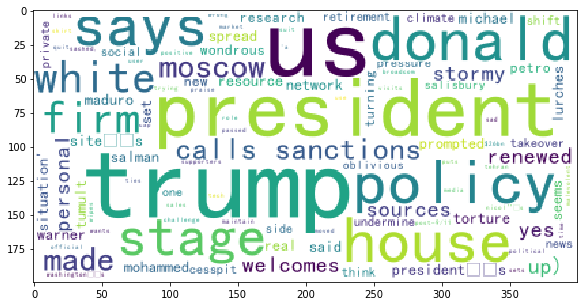

In [25]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

wordcloud=WordCloud(font_path="./data/simhei.ttf",background_color="white",max_font_size=80)
word_frequence = {x[0]:x[1] for x in words_count.head(100).values}
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)

In [26]:
words_headline=pd.DataFrame({'all_words_headline':all_words_headline})
words_headline.head()

,all_words_headline
0,brussels
1,offers
2,us
3,ally
4,steel


In [27]:
words_count_headline=words_headline.groupby(by=['all_words_headline'])['all_words_headline'].agg({"count":np.size})
words_count_headline=words_count_headline.reset_index().sort_values(by=["count"],ascending=False)
words_count_headline.head()

C:\Users\wyl\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,all_words_headline,count
105,trump,1194
110,us,792
89,russia,597
22,cambridge,597
48,face,597


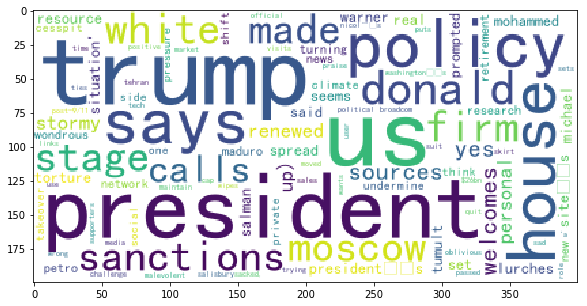

In [28]:
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

wordcloud=WordCloud(font_path="./data/simhei.ttf",background_color="white",max_font_size=80)
word_frequence = {x[0]:x[1] for x in words_count.head(100).values}
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)

In [29]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
WNlemma=nltk.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wyl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
summary_word3=data['summary_word'].tolist()
print data['summary_word'].iloc[3]

['drop', 'wipes', '$26bn', 'site\xa1\xafs', 'market', 'cap']


In [31]:
summary_word4=[]
for line in summary_word3:
    line_clean=[]
    for w in line:
        w=unicode(w, errors='replace')
        words=WNlemma.lemmatize(w)
        line_clean.append(words)
    summary_word4.append(line_clean)
print summary_word4[0:3]

[[u'eu', u'delegation', u'argue', u'trump', u'tariff', u'blaming', u'china', u'excess', u'supply'], [u'president', u'nicol\ufffd\ufffds', u'maduro', u'launched', u'petro', u'skirt', u'washington\ufffd\ufffds', u'sanction'], [u'tehran', u'high', u'agenda', u'u', u'president', u'welcome', u'mohammed', u'bin', u'salman', u'white', u'house']]


In [32]:
data['summary_meaning']=summary_word4

In [33]:
headline_word3=data['headline_word'].tolist()
#print data['summary_word'].iloc[3]
headline_word4=[]
for line in headline_word3:
    line_clean=[]
    for w in line:
        w=unicode(w, errors='replace')
        words=WNlemma.lemmatize(w)
        line_clean.append(words)
    headline_word4.append(line_clean)
print headline_word4[0:3]

[[u'brussels', u'offer', u'u', u'ally', u'steel', u'trade', u'fight'], [u'u', u'ban', u'trade', u'venezuela\ufffd\ufffds', u'digital', u'currency'], [u'saudi', u'push', u'trump', u'harder', u'line', u'iran']]


In [34]:
data['headline_meaning']=headline_word4

In [35]:
import sys

In [36]:
pairs=list()
for line in data['summary_meaning']:
    for i in range(len(line)-1):
        pair=line[i:i+2]
        pairs.append(pair)

In [37]:
for pair in pairs:
    print ' '.join(pair)

eu delegation
delegation argue
argue trump
trump tariff
tariff blaming
blaming china
china excess
excess supply
president nicol��s
nicol��s maduro
maduro launched
launched petro
petro skirt
skirt washington��s
washington��s sanction
tehran high
high agenda
agenda u
u president
president welcome
welcome mohammed
mohammed bin
bin salman
salman white
white house
drop wipe
wipe $26bn
$26bn site��s
site��s market
market cap
wondrous informational
informational resource
resource turning
turning cyber
cyber cesspit
almost every
every economic
economic policy
policy president
president put
put countered
countered another
renewed fire
fire president��s
president��s denunciation
denunciation personal
personal lawyer
lawyer call
call end
end inquiry
firm link
link trump
trump election
election pressure
pressure facebook
facebook ban
ban data
data harvesting
doj��s challenge
challenge time
time warner
warner deal
deal set
set stage
stage future
future medium
medium consolidation
social network
net

network claim
claim research
research firm
firm failed
failed delete
delete user
user information
information collected
collected app
challenging climate
climate former
former employee
employee quit
quit forced
u attorney-general
attorney-general act
act retirement
retirement official
official attacked
attacked donald
donald trump
michael cohen
cohen want
want stormy
stormy daniel
daniel suit
suit moved
moved private
private arbitration
limit government
government interference
interference tech
tech industry?
white house
house lurch
lurch one
one crisis
crisis another,
another, key
key figure
figure leave
leave sacked,
sacked, real
real economy
economy seems
seems oblivious
oblivious political
political tumult
role post-9/11
post-9/11 torture
torture drew
drew criticism
criticism yet
yet supporter
supporter praise
praise collegiate
collegiate side
aggressive action
action moscow
moscow prompted
prompted shift
shift u
u policy
broadcom chief
chief made
made wrong
wrong bet
bet trying
tr

official attacked
attacked donald
donald trump
michael cohen
cohen want
want stormy
stormy daniel
daniel suit
suit moved
moved private
private arbitration
limit government
government interference
interference tech
tech industry?
white house
house lurch
lurch one
one crisis
crisis another,
another, key
key figure
figure leave
leave sacked,
sacked, real
real economy
economy seems
seems oblivious
oblivious political
political tumult
role post-9/11
post-9/11 torture
torture drew
drew criticism
criticism yet
yet supporter
supporter praise
praise collegiate
collegiate side
aggressive action
action moscow
moscow prompted
prompted shift
shift u
u policy
broadcom chief
chief made
made wrong
wrong bet
bet trying
trying use
use positive
positive trump
trump tie
tie takeover
takeover bid
u say
say maintain
maintain sanction
sanction moscow
moscow change
change behaviour
u president
president call
call salisbury
salisbury attack
attack 'a
'a sad
sad situation'
new law
law passed
passed congress
con

could spread
spread fake
fake news
news undermine
undermine exercise
eu delegation
delegation argue
argue trump
trump tariff
tariff blaming
blaming china
china excess
excess supply
president nicol��s
nicol��s maduro
maduro launched
launched petro
petro skirt
skirt washington��s
washington��s sanction
tehran high
high agenda
agenda u
u president
president welcome
welcome mohammed
mohammed bin
bin salman
salman white
white house
drop wipe
wipe $26bn
$26bn site��s
site��s market
market cap
wondrous informational
informational resource
resource turning
turning cyber
cyber cesspit
almost every
every economic
economic policy
policy president
president put
put countered
countered another
renewed fire
fire president��s
president��s denunciation
denunciation personal
personal lawyer
lawyer call
call end
end inquiry
firm link
link trump
trump election
election pressure
pressure facebook
facebook ban
ban data
data harvesting
doj��s challenge
challenge time
time warner
warner deal
deal set
set sta

former employee
employee quit
quit forced
u attorney-general
attorney-general act
act retirement
retirement official
official attacked
attacked donald
donald trump
michael cohen
cohen want
want stormy
stormy daniel
daniel suit
suit moved
moved private
private arbitration
limit government
government interference
interference tech
tech industry?
white house
house lurch
lurch one
one crisis
crisis another,
another, key
key figure
figure leave
leave sacked,
sacked, real
real economy
economy seems
seems oblivious
oblivious political
political tumult
role post-9/11
post-9/11 torture
torture drew
drew criticism
criticism yet
yet supporter
supporter praise
praise collegiate
collegiate side
aggressive action
action moscow
moscow prompted
prompted shift
shift u
u policy
broadcom chief
chief made
made wrong
wrong bet
bet trying
trying use
use positive
positive trump
trump tie
tie takeover
takeover bid
u say
say maintain
maintain sanction
sanction moscow
moscow change
change behaviour
u president


increased arm
arm sale
donald trump
trump say
say yes
yes (but
(but also
also said
said made
made up)
intelligence source
source think
think malevolent
malevolent actor
actor could
could spread
spread fake
fake news
news undermine
undermine exercise
eu delegation
delegation argue
argue trump
trump tariff
tariff blaming
blaming china
china excess
excess supply
president nicol��s
nicol��s maduro
maduro launched
launched petro
petro skirt
skirt washington��s
washington��s sanction
tehran high
high agenda
agenda u
u president
president welcome
welcome mohammed
mohammed bin
bin salman
salman white
white house
drop wipe
wipe $26bn
$26bn site��s
site��s market
market cap
wondrous informational
informational resource
resource turning
turning cyber
cyber cesspit
almost every
every economic
economic policy
policy president
president put
put countered
countered another
renewed fire
fire president��s
president��s denunciation
denunciation personal
personal lawyer
lawyer call
call end
end inquiry
f

stage future
future medium
medium consolidation
social network
network claim
claim research
research firm
firm failed
failed delete
delete user
user information
information collected
collected app
challenging climate
climate former
former employee
employee quit
quit forced
u attorney-general
attorney-general act
act retirement
retirement official
official attacked
attacked donald
donald trump
michael cohen
cohen want
want stormy
stormy daniel
daniel suit
suit moved
moved private
private arbitration
limit government
government interference
interference tech
tech industry?
white house
house lurch
lurch one
one crisis
crisis another,
another, key
key figure
figure leave
leave sacked,
sacked, real
real economy
economy seems
seems oblivious
oblivious political
political tumult
role post-9/11
post-9/11 torture
torture drew
drew criticism
criticism yet
yet supporter
supporter praise
praise collegiate
collegiate side
aggressive action
action moscow
moscow prompted
prompted shift
shift u
u poli

u president
president call
call salisbury
salisbury attack
attack 'a
'a sad
sad situation'
new law
law passed
passed congress
congress set
set stage
stage high-level
high-level visit
visit increased
increased arm
arm sale
donald trump
trump say
say yes
yes (but
(but also
also said
said made
made up)
intelligence source
source think
think malevolent
malevolent actor
actor could
could spread
spread fake
fake news
news undermine
undermine exercise
eu delegation
delegation argue
argue trump
trump tariff
tariff blaming
blaming china
china excess
excess supply
president nicol��s
nicol��s maduro
maduro launched
launched petro
petro skirt
skirt washington��s
washington��s sanction
tehran high
high agenda
agenda u
u president
president welcome
welcome mohammed
mohammed bin
bin salman
salman white
white house
drop wipe
wipe $26bn
$26bn site��s
site��s market
market cap
wondrous informational
informational resource
resource turning
turning cyber
cyber cesspit
almost every
every economic
economic 

end inquiry
firm link
link trump
trump election
election pressure
pressure facebook
facebook ban
ban data
data harvesting
doj��s challenge
challenge time
time warner
warner deal
deal set
set stage
stage future
future medium
medium consolidation
social network
network claim
claim research
research firm
firm failed
failed delete
delete user
user information
information collected
collected app
challenging climate
climate former
former employee
employee quit
quit forced
u attorney-general
attorney-general act
act retirement
retirement official
official attacked
attacked donald
donald trump
michael cohen
cohen want
want stormy
stormy daniel
daniel suit
suit moved
moved private
private arbitration
limit government
government interference
interference tech
tech industry?
white house
house lurch
lurch one
one crisis
crisis another,
another, key
key figure
figure leave
leave sacked,
sacked, real
real economy
economy seems
seems oblivious
oblivious political
political tumult
role post-9/11
post-

made wrong
wrong bet
bet trying
trying use
use positive
positive trump
trump tie
tie takeover
takeover bid
u say
say maintain
maintain sanction
sanction moscow
moscow change
change behaviour
u president
president call
call salisbury
salisbury attack
attack 'a
'a sad
sad situation'
new law
law passed
passed congress
congress set
set stage
stage high-level
high-level visit
visit increased
increased arm
arm sale
donald trump
trump say
say yes
yes (but
(but also
also said
said made
made up)
intelligence source
source think
think malevolent
malevolent actor
actor could
could spread
spread fake
fake news
news undermine
undermine exercise
eu delegation
delegation argue
argue trump
trump tariff
tariff blaming
blaming china
china excess
excess supply
president nicol��s
nicol��s maduro
maduro launched
launched petro
petro skirt
skirt washington��s
washington��s sanction
tehran high
high agenda
agenda u
u president
president welcome
welcome mohammed
mohammed bin
bin salman
salman white
white hous

cyber cesspit
almost every
every economic
economic policy
policy president
president put
put countered
countered another
renewed fire
fire president��s
president��s denunciation
denunciation personal
personal lawyer
lawyer call
call end
end inquiry
firm link
link trump
trump election
election pressure
pressure facebook
facebook ban
ban data
data harvesting
doj��s challenge
challenge time
time warner
warner deal
deal set
set stage
stage future
future medium
medium consolidation
social network
network claim
claim research
research firm
firm failed
failed delete
delete user
user information
information collected
collected app
challenging climate
climate former
former employee
employee quit
quit forced
u attorney-general
attorney-general act
act retirement
retirement official
official attacked
attacked donald
donald trump
michael cohen
cohen want
want stormy
stormy daniel
daniel suit
suit moved
moved private
private arbitration
limit government
government interference
interference tech
tec

torture drew
drew criticism
criticism yet
yet supporter
supporter praise
praise collegiate
collegiate side
aggressive action
action moscow
moscow prompted
prompted shift
shift u
u policy
broadcom chief
chief made
made wrong
wrong bet
bet trying
trying use
use positive
positive trump
trump tie
tie takeover
takeover bid
u say
say maintain
maintain sanction
sanction moscow
moscow change
change behaviour
u president
president call
call salisbury
salisbury attack
attack 'a
'a sad
sad situation'
new law
law passed
passed congress
congress set
set stage
stage high-level
high-level visit
visit increased
increased arm
arm sale
donald trump
trump say
say yes
yes (but
(but also
also said
said made
made up)
intelligence source
source think
think malevolent
malevolent actor
actor could
could spread
spread fake
fake news
news undermine
undermine exercise
eu delegation
delegation argue
argue trump
trump tariff
tariff blaming
blaming china
china excess
excess supply
president nicol��s
nicol��s maduro


president welcome
welcome mohammed
mohammed bin
bin salman
salman white
white house
drop wipe
wipe $26bn
$26bn site��s
site��s market
market cap
wondrous informational
informational resource
resource turning
turning cyber
cyber cesspit
almost every
every economic
economic policy
policy president
president put
put countered
countered another
renewed fire
fire president��s
president��s denunciation
denunciation personal
personal lawyer
lawyer call
call end
end inquiry
firm link
link trump
trump election
election pressure
pressure facebook
facebook ban
ban data
data harvesting
doj��s challenge
challenge time
time warner
warner deal
deal set
set stage
stage future
future medium
medium consolidation
social network
network claim
claim research
research firm
firm failed
failed delete
delete user
user information
information collected
collected app
challenging climate
climate former
former employee
employee quit
quit forced
u attorney-general
attorney-general act
act retirement
retirement offi

lurch one
one crisis
crisis another,
another, key
key figure
figure leave
leave sacked,
sacked, real
real economy
economy seems
seems oblivious
oblivious political
political tumult
role post-9/11
post-9/11 torture
torture drew
drew criticism
criticism yet
yet supporter
supporter praise
praise collegiate
collegiate side
aggressive action
action moscow
moscow prompted
prompted shift
shift u
u policy
broadcom chief
chief made
made wrong
wrong bet
bet trying
trying use
use positive
positive trump
trump tie
tie takeover
takeover bid
u say
say maintain
maintain sanction
sanction moscow
moscow change
change behaviour
u president
president call
call salisbury
salisbury attack
attack 'a
'a sad
sad situation'
new law
law passed
passed congress
congress set
set stage
stage high-level
high-level visit
visit increased
increased arm
arm sale
donald trump
trump say
say yes
yes (but
(but also
also said
said made
made up)
intelligence source
source think
think malevolent
malevolent actor
actor could
co

tariff blaming
blaming china
china excess
excess supply
president nicol��s
nicol��s maduro
maduro launched
launched petro
petro skirt
skirt washington��s
washington��s sanction
tehran high
high agenda
agenda u
u president
president welcome
welcome mohammed
mohammed bin
bin salman
salman white
white house
drop wipe
wipe $26bn
$26bn site��s
site��s market
market cap
wondrous informational
informational resource
resource turning
turning cyber
cyber cesspit
almost every
every economic
economic policy
policy president
president put
put countered
countered another
renewed fire
fire president��s
president��s denunciation
denunciation personal
personal lawyer
lawyer call
call end
end inquiry
firm link
link trump
trump election
election pressure
pressure facebook
facebook ban
ban data
data harvesting
doj��s challenge
challenge time
time warner
warner deal
deal set
set stage
stage future
future medium
medium consolidation
social network
network claim
claim research
research firm
firm failed
fail

donald trump
michael cohen
cohen want
want stormy
stormy daniel
daniel suit
suit moved
moved private
private arbitration
limit government
government interference
interference tech
tech industry?
white house
house lurch
lurch one
one crisis
crisis another,
another, key
key figure
figure leave
leave sacked,
sacked, real
real economy
economy seems
seems oblivious
oblivious political
political tumult
role post-9/11
post-9/11 torture
torture drew
drew criticism
criticism yet
yet supporter
supporter praise
praise collegiate
collegiate side
aggressive action
action moscow
moscow prompted
prompted shift
shift u
u policy
broadcom chief
chief made
made wrong
wrong bet
bet trying
trying use
use positive
positive trump
trump tie
tie takeover
takeover bid
u say
say maintain
maintain sanction
sanction moscow
moscow change
change behaviour
u president
president call
call salisbury
salisbury attack
attack 'a
'a sad
sad situation'
new law
law passed
passed congress
congress set
set stage
stage high-lev

made up)
intelligence source
source think
think malevolent
malevolent actor
actor could
could spread
spread fake
fake news
news undermine
undermine exercise
eu delegation
delegation argue
argue trump
trump tariff
tariff blaming
blaming china
china excess
excess supply
president nicol��s
nicol��s maduro
maduro launched
launched petro
petro skirt
skirt washington��s
washington��s sanction
tehran high
high agenda
agenda u
u president
president welcome
welcome mohammed
mohammed bin
bin salman
salman white
white house
drop wipe
wipe $26bn
$26bn site��s
site��s market
market cap
wondrous informational
informational resource
resource turning
turning cyber
cyber cesspit
almost every
every economic
economic policy
policy president
president put
put countered
countered another
renewed fire
fire president��s
president��s denunciation
denunciation personal
personal lawyer
lawyer call
call end
end inquiry
firm link
link trump
trump election
election pressure
pressure facebook
facebook ban
ban data


delete user
user information
information collected
collected app
challenging climate
climate former
former employee
employee quit
quit forced
u attorney-general
attorney-general act
act retirement
retirement official
official attacked
attacked donald
donald trump
michael cohen
cohen want
want stormy
stormy daniel
daniel suit
suit moved
moved private
private arbitration
limit government
government interference
interference tech
tech industry?
white house
house lurch
lurch one
one crisis
crisis another,
another, key
key figure
figure leave
leave sacked,
sacked, real
real economy
economy seems
seems oblivious
oblivious political
political tumult
role post-9/11
post-9/11 torture
torture drew
drew criticism
criticism yet
yet supporter
supporter praise
praise collegiate
collegiate side
aggressive action
action moscow
moscow prompted
prompted shift
shift u
u policy
broadcom chief
chief made
made wrong
wrong bet
bet trying
trying use
use positive
positive trump
trump tie
tie takeover
takeover 

passed congress
congress set
set stage
stage high-level
high-level visit
visit increased
increased arm
arm sale
donald trump
trump say
say yes
yes (but
(but also
also said
said made
made up)
intelligence source
source think
think malevolent
malevolent actor
actor could
could spread
spread fake
fake news
news undermine
undermine exercise
eu delegation
delegation argue
argue trump
trump tariff
tariff blaming
blaming china
china excess
excess supply
president nicol��s
nicol��s maduro
maduro launched
launched petro
petro skirt
skirt washington��s
washington��s sanction
tehran high
high agenda
agenda u
u president
president welcome
welcome mohammed
mohammed bin
bin salman
salman white
white house
drop wipe
wipe $26bn
$26bn site��s
site��s market
market cap
wondrous informational
informational resource
resource turning
turning cyber
cyber cesspit
almost every
every economic
economic policy
policy president
president put
put countered
countered another
renewed fire
fire president��s
president

doj��s challenge
challenge time
time warner
warner deal
deal set
set stage
stage future
future medium
medium consolidation
social network
network claim
claim research
research firm
firm failed
failed delete
delete user
user information
information collected
collected app
challenging climate
climate former
former employee
employee quit
quit forced
u attorney-general
attorney-general act
act retirement
retirement official
official attacked
attacked donald
donald trump
michael cohen
cohen want
want stormy
stormy daniel
daniel suit
suit moved
moved private
private arbitration
limit government
government interference
interference tech
tech industry?
white house
house lurch
lurch one
one crisis
crisis another,
another, key
key figure
figure leave
leave sacked,
sacked, real
real economy
economy seems
seems oblivious
oblivious political
political tumult
role post-9/11
post-9/11 torture
torture drew
drew criticism
criticism yet
yet supporter
supporter praise
praise collegiate
collegiate side
ag

u say
say maintain
maintain sanction
sanction moscow
moscow change
change behaviour
u president
president call
call salisbury
salisbury attack
attack 'a
'a sad
sad situation'
new law
law passed
passed congress
congress set
set stage
stage high-level
high-level visit
visit increased
increased arm
arm sale
donald trump
trump say
say yes
yes (but
(but also
also said
said made
made up)
intelligence source
source think
think malevolent
malevolent actor
actor could
could spread
spread fake
fake news
news undermine
undermine exercise
eu delegation
delegation argue
argue trump
trump tariff
tariff blaming
blaming china
china excess
excess supply
president nicol��s
nicol��s maduro
maduro launched
launched petro
petro skirt
skirt washington��s
washington��s sanction
tehran high
high agenda
agenda u
u president
president welcome
welcome mohammed
mohammed bin
bin salman
salman white
white house
drop wipe
wipe $26bn
$26bn site��s
site��s market
market cap
wondrous informational
informational resourc

fire president��s
president��s denunciation
denunciation personal
personal lawyer
lawyer call
call end
end inquiry
firm link
link trump
trump election
election pressure
pressure facebook
facebook ban
ban data
data harvesting
doj��s challenge
challenge time
time warner
warner deal
deal set
set stage
stage future
future medium
medium consolidation
social network
network claim
claim research
research firm
firm failed
failed delete
delete user
user information
information collected
collected app
challenging climate
climate former
former employee
employee quit
quit forced
u attorney-general
attorney-general act
act retirement
retirement official
official attacked
attacked donald
donald trump
michael cohen
cohen want
want stormy
stormy daniel
daniel suit
suit moved
moved private
private arbitration
limit government
government interference
interference tech
tech industry?
white house
house lurch
lurch one
one crisis
crisis another,
another, key
key figure
figure leave
leave sacked,
sacked, re

moscow prompted
prompted shift
shift u
u policy
broadcom chief
chief made
made wrong
wrong bet
bet trying
trying use
use positive
positive trump
trump tie
tie takeover
takeover bid
u say
say maintain
maintain sanction
sanction moscow
moscow change
change behaviour
u president
president call
call salisbury
salisbury attack
attack 'a
'a sad
sad situation'
new law
law passed
passed congress
congress set
set stage
stage high-level
high-level visit
visit increased
increased arm
arm sale
donald trump
trump say
say yes
yes (but
(but also
also said
said made
made up)
intelligence source
source think
think malevolent
malevolent actor
actor could
could spread
spread fake
fake news
news undermine
undermine exercise
eu delegation
delegation argue
argue trump
trump tariff
tariff blaming
blaming china
china excess
excess supply
president nicol��s
nicol��s maduro
maduro launched
launched petro
petro skirt
skirt washington��s
washington��s sanction
tehran high
high agenda
agenda u
u president
presiden

site��s market
market cap
wondrous informational
informational resource
resource turning
turning cyber
cyber cesspit
almost every
every economic
economic policy
policy president
president put
put countered
countered another
renewed fire
fire president��s
president��s denunciation
denunciation personal
personal lawyer
lawyer call
call end
end inquiry
firm link
link trump
trump election
election pressure
pressure facebook
facebook ban
ban data
data harvesting
doj��s challenge
challenge time
time warner
warner deal
deal set
set stage
stage future
future medium
medium consolidation
social network
network claim
claim research
research firm
firm failed
failed delete
delete user
user information
information collected
collected app
challenging climate
climate former
former employee
employee quit
quit forced
u attorney-general
attorney-general act
act retirement
retirement official
official attacked
attacked donald
donald trump
michael cohen
cohen want
want stormy
stormy daniel
daniel suit
suit

economy seems
seems oblivious
oblivious political
political tumult
role post-9/11
post-9/11 torture
torture drew
drew criticism
criticism yet
yet supporter
supporter praise
praise collegiate
collegiate side
aggressive action
action moscow
moscow prompted
prompted shift
shift u
u policy
broadcom chief
chief made
made wrong
wrong bet
bet trying
trying use
use positive
positive trump
trump tie
tie takeover
takeover bid
u say
say maintain
maintain sanction
sanction moscow
moscow change
change behaviour
u president
president call
call salisbury
salisbury attack
attack 'a
'a sad
sad situation'
new law
law passed
passed congress
congress set
set stage
stage high-level
high-level visit
visit increased
increased arm
arm sale
donald trump
trump say
say yes
yes (but
(but also
also said
said made
made up)
intelligence source
source think
think malevolent
malevolent actor
actor could
could spread
spread fake
fake news
news undermine
undermine exercise
eu delegation
delegation argue
argue trump
trum

skirt washington��s
washington��s sanction
tehran high
high agenda
agenda u
u president
president welcome
welcome mohammed
mohammed bin
bin salman
salman white
white house
drop wipe
wipe $26bn
$26bn site��s
site��s market
market cap
wondrous informational
informational resource
resource turning
turning cyber
cyber cesspit
almost every
every economic
economic policy
policy president
president put
put countered
countered another
renewed fire
fire president��s
president��s denunciation
denunciation personal
personal lawyer
lawyer call
call end
end inquiry
firm link
link trump
trump election
election pressure
pressure facebook
facebook ban
ban data
data harvesting
doj��s challenge
challenge time
time warner
warner deal
deal set
set stage
stage future
future medium
medium consolidation
social network
network claim
claim research
research firm
firm failed
failed delete
delete user
user information
information collected
collected app
challenging climate
climate former
former employee
employee

limit government
government interference
interference tech
tech industry?
white house
house lurch
lurch one
one crisis
crisis another,
another, key
key figure
figure leave
leave sacked,
sacked, real
real economy
economy seems
seems oblivious
oblivious political
political tumult
role post-9/11
post-9/11 torture
torture drew
drew criticism
criticism yet
yet supporter
supporter praise
praise collegiate
collegiate side
aggressive action
action moscow
moscow prompted
prompted shift
shift u
u policy
broadcom chief
chief made
made wrong
wrong bet
bet trying
trying use
use positive
positive trump
trump tie
tie takeover
takeover bid
u say
say maintain
maintain sanction
sanction moscow
moscow change
change behaviour
u president
president call
call salisbury
salisbury attack
attack 'a
'a sad
sad situation'
new law
law passed
passed congress
congress set
set stage
stage high-level
high-level visit
visit increased
increased arm
arm sale
donald trump
trump say
say yes
yes (but
(but also
also said
sa

news undermine
undermine exercise
eu delegation
delegation argue
argue trump
trump tariff
tariff blaming
blaming china
china excess
excess supply
president nicol��s
nicol��s maduro
maduro launched
launched petro
petro skirt
skirt washington��s
washington��s sanction
tehran high
high agenda
agenda u
u president
president welcome
welcome mohammed
mohammed bin
bin salman
salman white
white house
drop wipe
wipe $26bn
$26bn site��s
site��s market
market cap
wondrous informational
informational resource
resource turning
turning cyber
cyber cesspit
almost every
every economic
economic policy
policy president
president put
put countered
countered another
renewed fire
fire president��s
president��s denunciation
denunciation personal
personal lawyer
lawyer call
call end
end inquiry
firm link
link trump
trump election
election pressure
pressure facebook
facebook ban
ban data
data harvesting
doj��s challenge
challenge time
time warner
warner deal
deal set
set stage
stage future
future medium
mediu

u attorney-general
attorney-general act
act retirement
retirement official
official attacked
attacked donald
donald trump
michael cohen
cohen want
want stormy
stormy daniel
daniel suit
suit moved
moved private
private arbitration
limit government
government interference
interference tech
tech industry?
white house
house lurch
lurch one
one crisis
crisis another,
another, key
key figure
figure leave
leave sacked,
sacked, real
real economy
economy seems
seems oblivious
oblivious political
political tumult
role post-9/11
post-9/11 torture
torture drew
drew criticism
criticism yet
yet supporter
supporter praise
praise collegiate
collegiate side
aggressive action
action moscow
moscow prompted
prompted shift
shift u
u policy
broadcom chief
chief made
made wrong
wrong bet
bet trying
trying use
use positive
positive trump
trump tie
tie takeover
takeover bid
u say
say maintain
maintain sanction
sanction moscow
moscow change
change behaviour
u president
president call
call salisbury
salisbury at

trump say
say yes
yes (but
(but also
also said
said made
made up)
intelligence source
source think
think malevolent
malevolent actor
actor could
could spread
spread fake
fake news
news undermine
undermine exercise
eu delegation
delegation argue
argue trump
trump tariff
tariff blaming
blaming china
china excess
excess supply
president nicol��s
nicol��s maduro
maduro launched
launched petro
petro skirt
skirt washington��s
washington��s sanction
tehran high
high agenda
agenda u
u president
president welcome
welcome mohammed
mohammed bin
bin salman
salman white
white house
drop wipe
wipe $26bn
$26bn site��s
site��s market
market cap
wondrous informational
informational resource
resource turning
turning cyber
cyber cesspit
almost every
every economic
economic policy
policy president
president put
put countered
countered another
renewed fire
fire president��s
president��s denunciation
denunciation personal
personal lawyer
lawyer call
call end
end inquiry
firm link
link trump
trump election
e

social network
network claim
claim research
research firm
firm failed
failed delete
delete user
user information
information collected
collected app
challenging climate
climate former
former employee
employee quit
quit forced
u attorney-general
attorney-general act
act retirement
retirement official
official attacked
attacked donald
donald trump
michael cohen
cohen want
want stormy
stormy daniel
daniel suit
suit moved
moved private
private arbitration
limit government
government interference
interference tech
tech industry?
white house
house lurch
lurch one
one crisis
crisis another,
another, key
key figure
figure leave
leave sacked,
sacked, real
real economy
economy seems
seems oblivious
oblivious political
political tumult
role post-9/11
post-9/11 torture
torture drew
drew criticism
criticism yet
yet supporter
supporter praise
praise collegiate
collegiate side
aggressive action
action moscow
moscow prompted
prompted shift
shift u
u policy
broadcom chief
chief made
made wrong
wrong be

salisbury attack
attack 'a
'a sad
sad situation'
new law
law passed
passed congress
congress set
set stage
stage high-level
high-level visit
visit increased
increased arm
arm sale
donald trump
trump say
say yes
yes (but
(but also
also said
said made
made up)
intelligence source
source think
think malevolent
malevolent actor
actor could
could spread
spread fake
fake news
news undermine
undermine exercise
eu delegation
delegation argue
argue trump
trump tariff
tariff blaming
blaming china
china excess
excess supply
president nicol��s
nicol��s maduro
maduro launched
launched petro
petro skirt
skirt washington��s
washington��s sanction
tehran high
high agenda
agenda u
u president
president welcome
welcome mohammed
mohammed bin
bin salman
salman white
white house
drop wipe
wipe $26bn
$26bn site��s
site��s market
market cap
wondrous informational
informational resource
resource turning
turning cyber
cyber cesspit
almost every
every economic
economic policy
policy president
president put
put 

trump election
election pressure
pressure facebook
facebook ban
ban data
data harvesting
doj��s challenge
challenge time
time warner
warner deal
deal set
set stage
stage future
future medium
medium consolidation
social network
network claim
claim research
research firm
firm failed
failed delete
delete user
user information
information collected
collected app
challenging climate
climate former
former employee
employee quit
quit forced
u attorney-general
attorney-general act
act retirement
retirement official
official attacked
attacked donald
donald trump
michael cohen
cohen want
want stormy
stormy daniel
daniel suit
suit moved
moved private
private arbitration
limit government
government interference
interference tech
tech industry?
white house
house lurch
lurch one
one crisis
crisis another,
another, key
key figure
figure leave
leave sacked,
sacked, real
real economy
economy seems
seems oblivious
oblivious political
political tumult
role post-9/11
post-9/11 torture
torture drew
drew cr

trying use
use positive
positive trump
trump tie
tie takeover
takeover bid
u say
say maintain
maintain sanction
sanction moscow
moscow change
change behaviour
u president
president call
call salisbury
salisbury attack
attack 'a
'a sad
sad situation'
new law
law passed
passed congress
congress set
set stage
stage high-level
high-level visit
visit increased
increased arm
arm sale
donald trump
trump say
say yes
yes (but
(but also
also said
said made
made up)
intelligence source
source think
think malevolent
malevolent actor
actor could
could spread
spread fake
fake news
news undermine
undermine exercise
eu delegation
delegation argue
argue trump
trump tariff
tariff blaming
blaming china
china excess
excess supply
president nicol��s
nicol��s maduro
maduro launched
launched petro
petro skirt
skirt washington��s
washington��s sanction
tehran high
high agenda
agenda u
u president
president welcome
welcome mohammed
mohammed bin
bin salman
salman white
white house
drop wipe
wipe $26bn
$26bn sit

economic policy
policy president
president put
put countered
countered another
renewed fire
fire president��s
president��s denunciation
denunciation personal
personal lawyer
lawyer call
call end
end inquiry
firm link
link trump
trump election
election pressure
pressure facebook
facebook ban
ban data
data harvesting
doj��s challenge
challenge time
time warner
warner deal
deal set
set stage
stage future
future medium
medium consolidation
social network
network claim
claim research
research firm
firm failed
failed delete
delete user
user information
information collected
collected app
challenging climate
climate former
former employee
employee quit
quit forced
u attorney-general
attorney-general act
act retirement
retirement official
official attacked
attacked donald
donald trump
michael cohen
cohen want
want stormy
stormy daniel
daniel suit
suit moved
moved private
private arbitration
limit government
government interference
interference tech
tech industry?
white house
house lurch
lurch 

yet supporter
supporter praise
praise collegiate
collegiate side
aggressive action
action moscow
moscow prompted
prompted shift
shift u
u policy
broadcom chief
chief made
made wrong
wrong bet
bet trying
trying use
use positive
positive trump
trump tie
tie takeover
takeover bid
u say
say maintain
maintain sanction
sanction moscow
moscow change
change behaviour
u president
president call
call salisbury
salisbury attack
attack 'a
'a sad
sad situation'
new law
law passed
passed congress
congress set
set stage
stage high-level
high-level visit
visit increased
increased arm
arm sale
donald trump
trump say
say yes
yes (but
(but also
also said
said made
made up)
intelligence source
source think
think malevolent
malevolent actor
actor could
could spread
spread fake
fake news
news undermine
undermine exercise
eu delegation
delegation argue
argue trump
trump tariff
tariff blaming
blaming china
china excess
excess supply
president nicol��s
nicol��s maduro
maduro launched
launched petro
petro skirt

bin salman
salman white
white house
drop wipe
wipe $26bn
$26bn site��s
site��s market
market cap
wondrous informational
informational resource
resource turning
turning cyber
cyber cesspit
almost every
every economic
economic policy
policy president
president put
put countered
countered another
renewed fire
fire president��s
president��s denunciation
denunciation personal
personal lawyer
lawyer call
call end
end inquiry
firm link
link trump
trump election
election pressure
pressure facebook
facebook ban
ban data
data harvesting
doj��s challenge
challenge time
time warner
warner deal
deal set
set stage
stage future
future medium
medium consolidation
social network
network claim
claim research
research firm
firm failed
failed delete
delete user
user information
information collected
collected app
challenging climate
climate former
former employee
employee quit
quit forced
u attorney-general
attorney-general act
act retirement
retirement official
official attacked
attacked donald
donald tr

In [43]:
import sys
pairs_index = dict()

for line in data['summary_meaning']:
    for i in range(len(line)-1):
        pair=tuple(line[i:i+2])
        if pair in pairs_index:
            pairs_index[pair]+=1
        else:
            pairs_index[pair]=1

In [44]:
for pair in pairs_index.keys():
    count=pairs_index[pair]
    if count>1:
        print ' '.join(pair)+' '+str(count)

information collected 199
time warner 199
mohammed bin 199
could spread 199
turning cyber 199
market cap 199
trump tie 199
delegation argue 195
salman white 199
every economic 199
u attorney-general 199
u say 199
attorney-general act 199
figure leave 199
stormy daniel 199
agenda u 199
news undermine 199
change behaviour 199
stage high-level 199
tehran high 199
trump say 199
maduro launched 199
want stormy 199
election pressure 199
takeover bid 199
actor could 199
'a sad 199
resource turning 199
praise collegiate 199
china excess 195
failed delete 199
interference tech 199
future medium 199
key figure 199
wipe $26bn 199
political tumult 199
cohen want 199
use positive 199
stage future 199
eu delegation 195
oblivious political 199
visit increased 199
sad situation' 199
post-9/11 torture 199
daniel suit 199
law passed 199
house lurch 199
real economy 199
facebook ban 199
blaming china 195
malevolent actor 199
undermine exercise 199
president nicol��s 199
made up) 199
link trump 199
michae

In [45]:
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter

In [46]:
count_ngram=[]
for line in data['summary_meaning']:
    n_grams = ngrams(line,3)
    count=Counter(n_grams)
    count_ngram.append(count)
print count_ngram

[Counter({(u'delegation', u'argue', u'trump'): 1, (u'argue', u'trump', u'tariff'): 1, (u'trump', u'tariff', u'blaming'): 1, (u'eu', u'delegation', u'argue'): 1, (u'blaming', u'china', u'excess'): 1, (u'china', u'excess', u'supply'): 1, (u'tariff', u'blaming', u'china'): 1}), Counter({(u'petro', u'skirt', u'washington\ufffd\ufffds'): 1, (u'maduro', u'launched', u'petro'): 1, (u'launched', u'petro', u'skirt'): 1, (u'president', u'nicol\ufffd\ufffds', u'maduro'): 1, (u'nicol\ufffd\ufffds', u'maduro', u'launched'): 1, (u'skirt', u'washington\ufffd\ufffds', u'sanction'): 1}), Counter({(u'u', u'president', u'welcome'): 1, (u'high', u'agenda', u'u'): 1, (u'welcome', u'mohammed', u'bin'): 1, (u'president', u'welcome', u'mohammed'): 1, (u'tehran', u'high', u'agenda'): 1, (u'salman', u'white', u'house'): 1, (u'mohammed', u'bin', u'salman'): 1, (u'bin', u'salman', u'white'): 1, (u'agenda', u'u', u'president'): 1}), Counter({(u'drop', u'wipe', u'$26bn'): 1, (u'site\ufffd\ufffds', u'market', u'cap'

In [47]:
from nltk.collocations import *

In [48]:
bigram_measures=nltk.collocations.BigramAssocMeasures()

In [49]:
summary_list=data['summary_meaning'].tolist()
summary_list[0]
all_words_list=[]
for line in summary_list:
    for w in line:
        all_words_list.append(w)
all_words_list

[u'eu',
 u'delegation',
 u'argue',
 u'trump',
 u'tariff',
 u'blaming',
 u'china',
 u'excess',
 u'supply',
 u'president',
 u'nicol\ufffd\ufffds',
 u'maduro',
 u'launched',
 u'petro',
 u'skirt',
 u'washington\ufffd\ufffds',
 u'sanction',
 u'tehran',
 u'high',
 u'agenda',
 u'u',
 u'president',
 u'welcome',
 u'mohammed',
 u'bin',
 u'salman',
 u'white',
 u'house',
 u'drop',
 u'wipe',
 u'$26bn',
 u'site\ufffd\ufffds',
 u'market',
 u'cap',
 u'wondrous',
 u'informational',
 u'resource',
 u'turning',
 u'cyber',
 u'cesspit',
 u'almost',
 u'every',
 u'economic',
 u'policy',
 u'president',
 u'put',
 u'countered',
 u'another',
 u'renewed',
 u'fire',
 u'president\ufffd\ufffds',
 u'denunciation',
 u'personal',
 u'lawyer',
 u'call',
 u'end',
 u'inquiry',
 u'firm',
 u'link',
 u'trump',
 u'election',
 u'pressure',
 u'facebook',
 u'ban',
 u'data',
 u'harvesting',
 u'doj\ufffd\ufffds',
 u'challenge',
 u'time',
 u'warner',
 u'deal',
 u'set',
 u'stage',
 u'future',
 u'medium',
 u'consolidation',
 u'social',

In [50]:
finder=BigramCollocationFinder.from_words(all_words_list)
finder.nbest(bigram_measures.pmi,20)

[(u'blaming', u'china'),
 (u'china', u'excess'),
 (u'delegation', u'argue'),
 (u'eu', u'delegation'),
 (u'excess', u'supply'),
 (u'tariff', u'blaming'),
 (u'$26bn', u'site\ufffd\ufffds'),
 (u"'a", u'sad'),
 (u'(but', u'also'),
 (u'act', u'retirement'),
 (u'actor', u'could'),
 (u'aggressive', u'action'),
 (u'almost', u'every'),
 (u'also', u'said'),
 (u'another', u'renewed'),
 (u'another,', u'key'),
 (u'app', u'challenging'),
 (u'arbitration', u'limit'),
 (u'arm', u'sale'),
 (u'attack', u"'a")]

In [51]:
import gensim
from gensim import corpora, models, similarities

C:\Users\wyl\Anaconda2\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [49]:
from gensim import corpora, models, similarities

In [50]:
dictionary = corpora.Dictionary(summary_list)
corpus = [dictionary.doc2bow(sentence) for sentence in summary_list]

In [51]:
lda = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5) 

In [52]:
print (lda.print_topic(2, topn=5))

0.041*"u" + 0.027*"president" + 0.027*"call" + 0.027*"white" + 0.027*"house"


In [53]:
for topic in lda.print_topics(num_topics=5, num_words=5):
    print (topic[1])

0.051*"policy" + 0.027*"president" + 0.027*"u" + 0.026*"almost" + 0.026*"put"
0.041*"government" + 0.041*"limit" + 0.041*"interference" + 0.041*"tech" + 0.041*"industry?"
0.041*"u" + 0.027*"president" + 0.027*"call" + 0.027*"white" + 0.027*"house"
0.029*"trump" + 0.029*"made" + 0.029*"broadcom" + 0.029*"takeover" + 0.029*"tie"
0.055*"trump" + 0.054*"say" + 0.054*"firm" + 0.027*"u" + 0.027*"moscow"
